# Random images

Este notebook serve para gerar os dados para a questão. Você não deveria vê-lo


In [1]:
import cv2

import numpy as np

import random

import matplotlib.pyplot as plt

import mirutils as mir

def plotg(img):
    plt.imshow(img, vmin=0, vmax=255, cmap="Greys_r")

Rand1:

In [2]:
cruz = np.array([[0,255,0],[255,255,255],[0,255, 0]], dtype=np.uint8)

In [3]:
cruz

array([[  0, 255,   0],
       [255, 255, 255],
       [  0, 255,   0]], dtype=uint8)

In [4]:
cantos = np.bitwise_not(cruz)

In [5]:
cantos

array([[255,   0, 255],
       [  0,   0,   0],
       [255,   0, 255]], dtype=uint8)

In [6]:
def resize_big(img, scale):
    """ Resizes a grayscale image"""
    out_size = np.array(img.shape)*int(scale)
    print(img.shape, out_size)
    return cv2.resize(src=img, dsize=tuple(out_size), interpolation=cv2.INTER_NEAREST)

cruz_img_grande = resize_big(cruz, 50)
cantos_img_grande = resize_big(cantos, 50)

def resize_big_color(img, scale):
    """ Resizes a grayscale image"""
    out_size = np.array(img.shape)*int(scale)
    out_size = out_size[:-1]
    print(img.shape, out_size)
    return cv2.resize(src=img, dsize=tuple(out_size), interpolation=cv2.INTER_NEAREST)

cruz_img_grande = resize_big(cruz, 50)
cantos_img_grande = resize_big(cantos, 50)


(3, 3) [150 150]
(3, 3) [150 150]
(3, 3) [150 150]
(3, 3) [150 150]


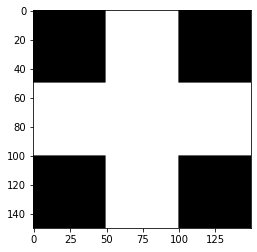

In [7]:
plt.imshow(cruz_img_grande, vmin=0, vmax=255, cmap="Greys_r")

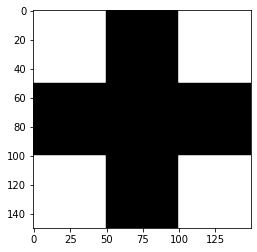

In [8]:
plt.imshow(cantos_img_grande, vmin=0, vmax=255, cmap="Greys_r")

In [9]:
cruz_negra = cantos

In [10]:
cv2.imwrite( "cruz50.png", cruz_img_grande)

True

In [11]:
cv2.imwrite( "cantos50.png", cantos_img_grande)

True

In [12]:
tamanho_teste = (300, 240)

In [13]:
bits = tamanho_teste[0]*tamanho_teste[1]

In [14]:

def replace_submatrix(mat, ind1, ind2, mat_replace):  
    for i in range(mat_replace.shape[0]): 
        for j in range(mat_replace.shape[1]):
            mat[ind1 + i , ind2+j] = mat_replace[i,j]
            


def create_random_field(tamanho):
    array = np.random.choice(np.array([0,255], dtype=np.uint8), size=tamanho)
    return array

In [15]:
rf1 = create_random_field(tamanho_teste)

(300, 240) [600 480]


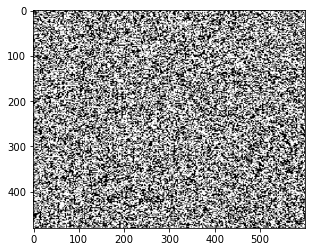

In [16]:
#plt.figure(figsize=(20,15))
plotg(resize_big(rf1, 2))

In [17]:
def inject_subm(big, small1, small2, times):
    i_row = big.shape[0] - 3
    j_row = big.shape[1] - small1.shape[1] - small2.shape[1]
    
    for t in range(times):
        i_ject = random.randint(3, i_row)
        j_ject = random.randint(3, j_row)
        print("idx", i_ject, j_ject)
        replace_submatrix(big, i_ject, j_ject, small1)
        replace_submatrix(big, i_ject, j_ject + small1.shape[1], small2)        
    return big


    

In [18]:
out1 = inject_subm(rf1, cruz, cantos, 8)

idx 63 197
idx 289 56
idx 108 61
idx 47 159
idx 232 59
idx 134 173
idx 16 70
idx 85 61


In [19]:
out2 = inject_subm(out1, cantos, cruz, 8)


idx 27 106
idx 155 38
idx 264 12
idx 195 67
idx 204 189
idx 297 216
idx 32 165
idx 180 188


In [20]:
def create_random_image(tam, mat1, mat2): 
    rf = create_random_field(tam)
    out1 = inject_subm(rf, mat1, mat2, 8)
    out2 = inject_subm(out1, mat2, mat1, 8)
    return out2

In [21]:
rf1 = create_random_image((240, 300), cruz, cruz_negra)

idx 144 256
idx 4 290
idx 101 266
idx 192 33
idx 200 106
idx 74 268
idx 58 247
idx 168 275
idx 226 126
idx 12 129
idx 152 70
idx 187 176
idx 206 55
idx 133 181
idx 148 163
idx 126 9


In [22]:
rf2 = create_random_image((240, 300), cruz_negra, cruz)

idx 55 7
idx 107 249
idx 157 277
idx 95 31
idx 212 46
idx 150 250
idx 108 29
idx 54 223
idx 31 126
idx 158 195
idx 8 144
idx 67 153
idx 93 199
idx 62 60
idx 149 39
idx 223 143


## plot_g(rf2)

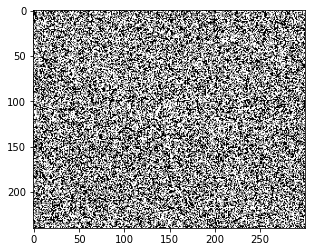

In [23]:
plotg(rf1)

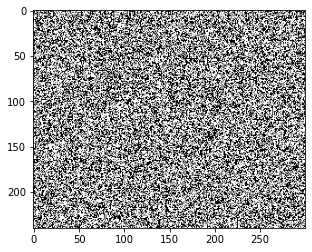

In [24]:
plotg(rf2)

In [25]:
cv2.imwrite("random1.png", rf1)

True

In [26]:
cv2.imwrite("random2.png", rf2)

True

In [27]:
lido = cv2.imread("random1.png")[0]

In [28]:
np.unique(lido)

array([  0, 255], dtype=uint8)

In [29]:
example = create_random_field((240, 300))

In [30]:
replace_submatrix(example, 30, 30, cruz)


In [31]:
replace_submatrix(example, 30, 33, cantos)

In [32]:
cv2.imwrite("exemplo_sem.png", example)

True

In [33]:
exemplo_grande = resize_big(example, 2)

(240, 300) [480 600]


In [34]:
cv2.imwrite("exemplo_sem_grande.png", exemplo_grande)

True

In [35]:
exemplo_bgr = cv2.cvtColor(example, cv2.COLOR_GRAY2BGR)

In [36]:
exemplo_bgr[30:32, 30:35] = (0,0,255)

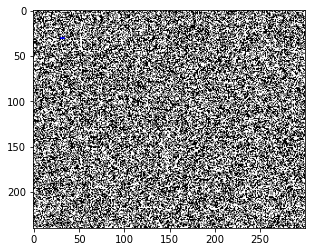

In [37]:
plt.imshow(exemplo_bgr)

In [38]:
exemplo_big = resize_big_color(exemplo_bgr, 4)

(240, 300, 3) [ 960 1200]


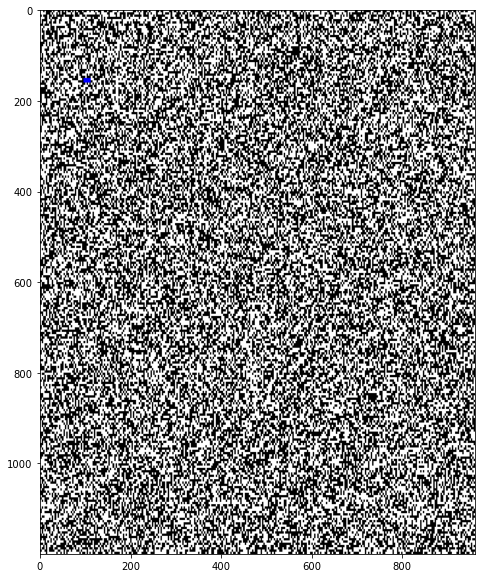

In [39]:
plt.figure(figsize=(12,10))
plt.imshow(exemplo_big)

In [40]:
cv2.imwrite("exemplo_big.png", exemplo_big)

True

## Criação dos diversos tamanhos

In [41]:
ex_30_60 = create_random_field((30, 30))
blk_30_60 = create_random_field((30,30))
blk_30_60[:] = 0
blk1 = blk_30_60.copy()
blk2 = blk_30_60.copy()
blk3 = blk_30_60.copy()


imgs = [ex_30_60, blk_30_60, blk1, blk2, blk3]

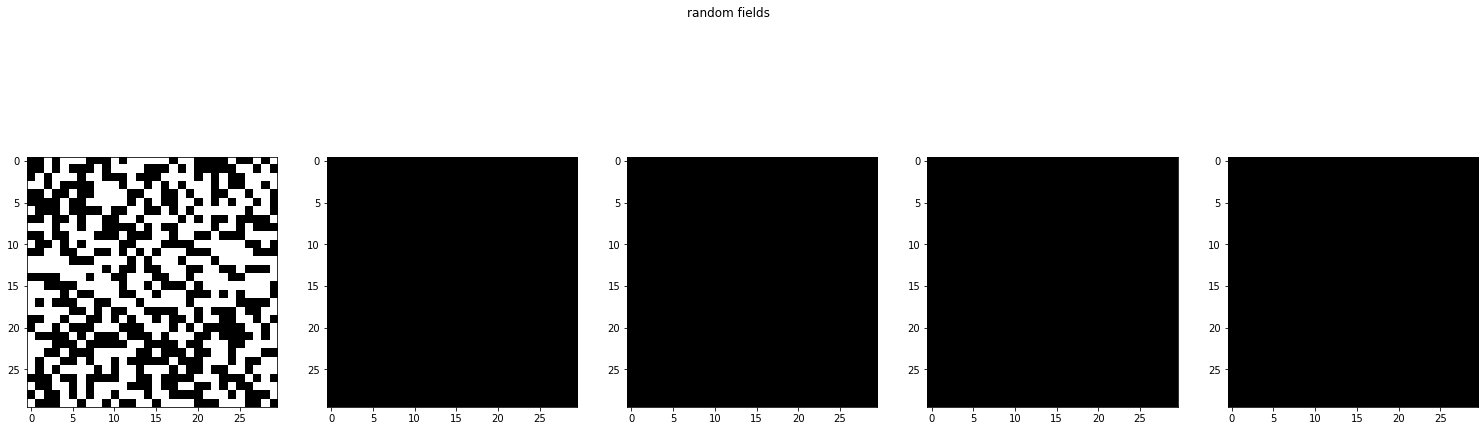

In [42]:
mir.multiplot_gray(imgs, legenda="random fields")

## Visualizando os padrões combinados

In [43]:
cb1 = blk_30_60.copy()
cb1[:] = 90

## 

In [44]:
origens = np.array(range(1,6))*4

In [45]:
origens_i = origens

In [46]:
J = 10

In [47]:
origens

array([ 4,  8, 12, 16, 20])

In [48]:
lista_branca = []
lista_negra = []

for i in origens:
    replace_submatrix(cb1, i, J, cruz)
    lista_branca.append((i, J))
    
    replace_submatrix(cb1, i, J + 10 , cruz_negra)    
    lista_negra.append((i, J + 10))


    


In [49]:
cb1.shape

(30, 30)

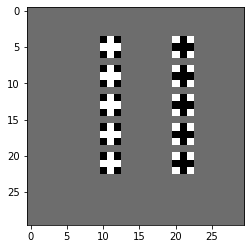

In [50]:
plotg(cb1)

In [51]:
cv2.imwrite("cruz_branca_negra_simples.png", cb1)

True

lista_branca

In [52]:
lista_branca

[(4, 10), (8, 10), (12, 10), (16, 10), (20, 10)]

In [53]:
lista_negra

[(4, 20), (8, 20), (12, 20), (16, 20), (20, 20)]

## Adjacências

In [54]:
cb2 = cb1.copy()
cb2[:] = 90


lista_branca = []
lista_negra = []

lista_branca_negra = []
lista_negra_branca = []


J = 3

for i in origens:
    
    ## Branca negra
    replace_submatrix(cb2, i, J, cruz)
    lista_branca.append((i, J))
    
    jp = J + cruz.shape[1]
    replace_submatrix(cb2, i, jp , cruz_negra)    
    lista_negra.append((i, jp))
    
    lista_branca_negra.append((i, J))
    
    ## Negra branca

    shift = 9
    Js = J + shift
    
    
    replace_submatrix(cb2, i, Js , cruz_negra)    
    lista_negra.append((i, Js))
    
    jp = Js + cruz_negra.shape[1]
    replace_submatrix(cb2, i, jp, cruz)
    lista_branca.append((i, jp))
    
    
    lista_negra_branca.append((i, Js))


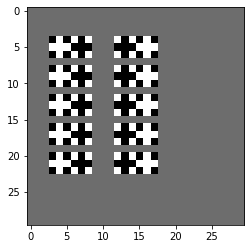

In [55]:
plotg(cb2)

In [56]:
cv2.imwrite("listas_brancas_negras.png", cb2)

True

In [57]:
lista_branca

[(4, 3),
 (4, 15),
 (8, 3),
 (8, 15),
 (12, 3),
 (12, 15),
 (16, 3),
 (16, 15),
 (20, 3),
 (20, 15)]

In [58]:
lista_negra

[(4, 6),
 (4, 12),
 (8, 6),
 (8, 12),
 (12, 6),
 (12, 12),
 (16, 6),
 (16, 12),
 (20, 6),
 (20, 12)]

In [59]:
lista_negra_branca

[(4, 12), (8, 12), (12, 12), (16, 12), (20, 12)]

In [60]:
lista_branca_negra

[(4, 3), (8, 3), (12, 3), (16, 3), (20, 3)]

In [61]:
def faz_listas_e_imagem(img, i_list, j, ref=False): 
    
    if ref:
        cb2 = img
    else:
        cb2 = img.copy()
    origens = i_list
    
    lista_branca = []
    lista_negra = []

    lista_branca_negra = []
    lista_negra_branca = []


    J = j

    for i in origens:

        ## Branca negra
        replace_submatrix(cb2, i, J, cruz)
        lista_branca.append((i, J))

        jp = J + cruz.shape[1]
        replace_submatrix(cb2, i, jp , cruz_negra)    
        lista_negra.append((i, jp))

        lista_branca_negra.append((i, J))

        ## Negra branca

        shift = 9
        Js = J + shift


        replace_submatrix(cb2, i, Js , cruz_negra)    
        lista_negra.append((i, Js))

        jp = Js + cruz_negra.shape[1]
        replace_submatrix(cb2, i, jp, cruz)
        lista_branca.append((i, jp))


        lista_negra_branca.append((i, Js))
    return cb2,lista_branca, lista_negra, lista_branca_negra, lista_negra_branca


        

In [62]:
def faz_quadrantes(lado, g1,g2,g3, g4):
    g = 100
    l = lado 
    h = int(l/2)
    img = np.zeros((l,l), dtype=np.uint8)
    img[:h,:h]  = g1
    img[:h,h:]  = g2
    img[h:,:h]  = g3
    img[h:,h:]  = g4
    return img  

In [63]:
z = np.zeros((300,200), dtype=np.uint8)

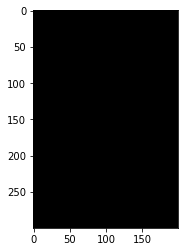

In [64]:
plotg(z)

In [65]:
i = range(3, 27, 5)

In [66]:
i

range(3, 27, 5)

In [67]:
out, lb, ln, lnb, lbn = faz_listas_e_imagem(z, i, 10)

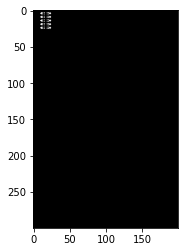

In [68]:
plotg(out)

In [69]:
z = faz_quadrantes(60, 75,100,125,150)
out, lb, ln, lnb, lbn = faz_listas_e_imagem(z, i, 10)

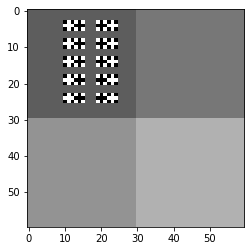

In [70]:
plotg(out)

## Quadrantes finais

In [71]:
q = 45

offset = 5
step_i = 4


i1 = 0 + offset
i1_list = range(i1, int(q/2)-offset, step_i)
j1 = 0 + offset
i2 = int(q/2) + offset 
i2_list = range(i2, int(q)-offset, step_i)
j2 = int(q/2) + offset

In [72]:
list(i1_list)

[5, 9, 13]

In [73]:
list(i2_list)

[27, 31, 35, 39]

In [74]:
g1,g2,g3,g4 = 75,100,125,150

img0 = faz_quadrantes(q, g1,g2,g3,g4)

out1, lb1, ln1, lnb1, lbn1 = faz_listas_e_imagem(img0, i1_list, j1, ref=False)
out2, lb2, ln2, lnb2, lbn2 = faz_listas_e_imagem(img0, i1_list, j2, ref=False)
out3, lb3, ln3, lnb3, lbn3 = faz_listas_e_imagem(img0, i2_list, j1, ref=False)
out4, lb4, ln4, lnb4, lbn4 = faz_listas_e_imagem(img0, i2_list, j2, ref=False)

In [75]:
list(i1_list)

[5, 9, 13]

plotg(img0)

In [76]:
plots = [out1, out2, out3, out4]

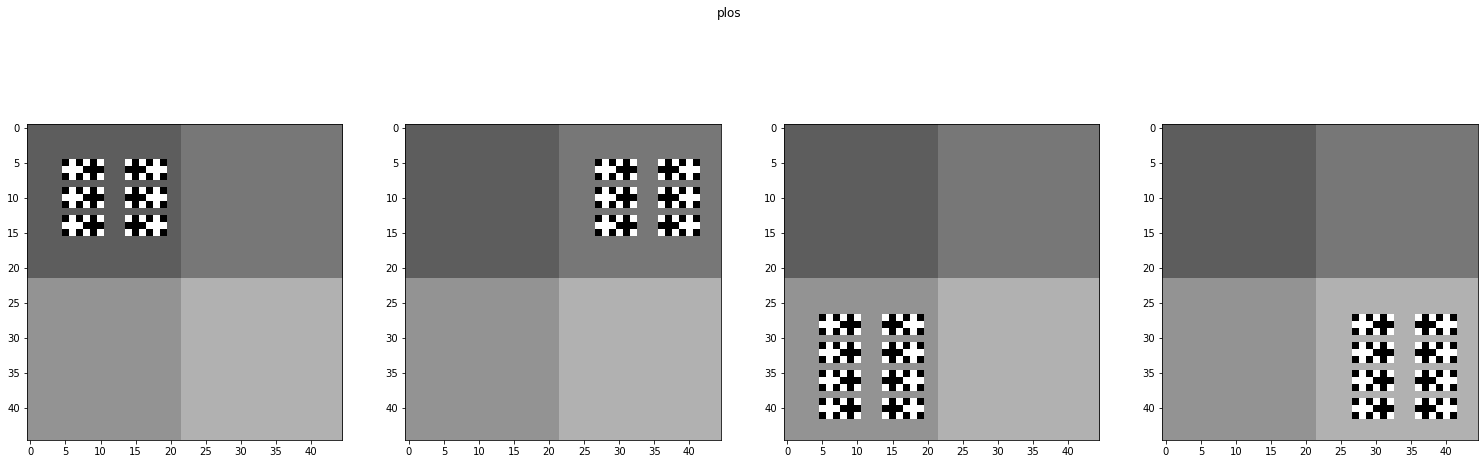

In [77]:
mir.multiplot_gray(plots, legenda="plos")

## Agora com ref e encerrando

In [78]:
g1,g2,g3,g4 = 75,100,125,150

q = 45

img0 = faz_quadrantes(q, g1,g2,g3,g4)

out1, lb1, ln1, lnb1, lbn1 = faz_listas_e_imagem(img0, i1_list, j1, ref=True)
out2, lb2, ln2, lnb2, lbn2 = faz_listas_e_imagem(img0, i1_list, j2, ref=True)
out3, lb3, ln3, lnb3, lbn3 = faz_listas_e_imagem(img0, i2_list, j1, ref=True)
out4, lb4, ln4, lnb4, lbn4 = faz_listas_e_imagem(img0, i2_list, j2, ref=True)

plots = [out1, out2, out3, out4]

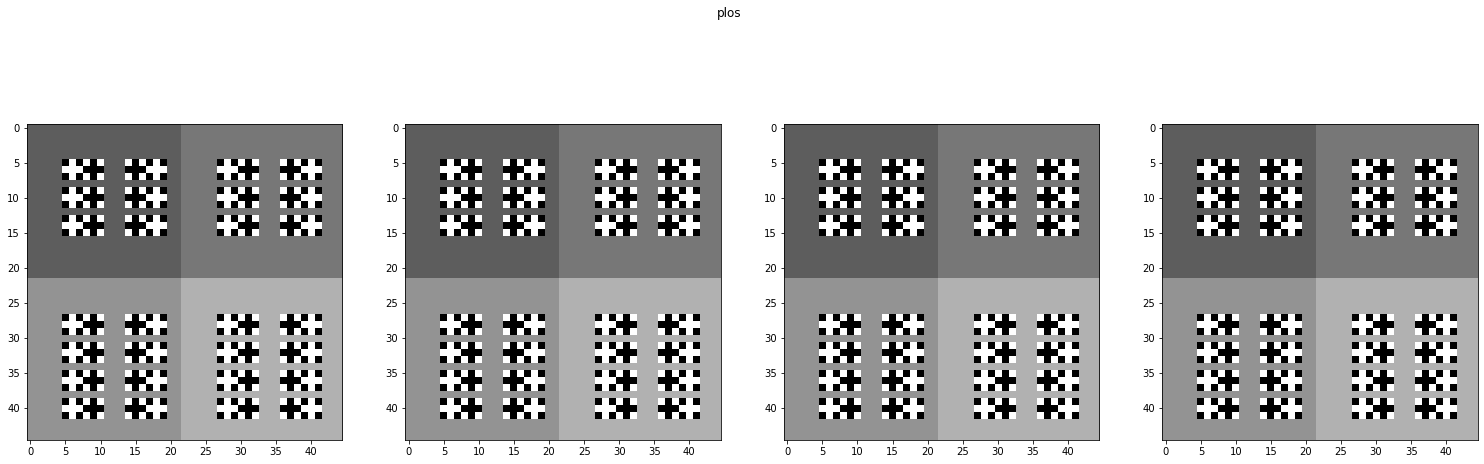

In [79]:
mir.multiplot_gray(plots, legenda="plos")

img_exemplo_quadrante = plots[0]

In [80]:
img_exemplo_quad = plots[0]
cv2.imwrite("exemplo_quadrante_75_100_125_150.png", img_exemplo_quad)

True

## Posições do canto superior esquerdo - 75

In [81]:
lb1

[(5, 5), (5, 17), (9, 5), (9, 17), (13, 5), (13, 17)]

In [82]:
ln1

[(5, 8), (5, 14), (9, 8), (9, 14), (13, 8), (13, 14)]

In [83]:
lbn1

[(5, 14), (9, 14), (13, 14)]

In [84]:
lbn1

[(5, 14), (9, 14), (13, 14)]

## Posições do canto superior esquerdo - 100

In [85]:
lb2

[(5, 27), (5, 39), (9, 27), (9, 39), (13, 27), (13, 39)]

In [86]:
ln2

[(5, 30), (5, 36), (9, 30), (9, 36), (13, 30), (13, 36)]

In [87]:
lbn2

[(5, 36), (9, 36), (13, 36)]

In [88]:
lnb2

[(5, 27), (9, 27), (13, 27)]

## Posições do canto superior esquerdo - 125

In [89]:
lb3

[(27, 5), (27, 17), (31, 5), (31, 17), (35, 5), (35, 17), (39, 5), (39, 17)]

In [90]:
ln3

[(27, 8), (27, 14), (31, 8), (31, 14), (35, 8), (35, 14), (39, 8), (39, 14)]

In [91]:
lbn2

[(5, 36), (9, 36), (13, 36)]

In [92]:
lnb3

[(27, 5), (31, 5), (35, 5), (39, 5)]

## Posições do canto inferior direito - 150

In [93]:
lb4

[(27, 27),
 (27, 39),
 (31, 27),
 (31, 39),
 (35, 27),
 (35, 39),
 (39, 27),
 (39, 39)]

In [94]:
ln4

[(27, 30),
 (27, 36),
 (31, 30),
 (31, 36),
 (35, 30),
 (35, 36),
 (39, 30),
 (39, 36)]

In [95]:
lbn4

[(27, 36), (31, 36), (35, 36), (39, 36)]

In [96]:
lnb4

[(27, 27), (31, 27), (35, 27), (39, 27)]

## Este vai para enunciado

## Com ref e mais espaçado

In [97]:




def faz_q(q, offset, step_i, ref=True):
    

    q = q

    offset = offset
    step_i = step_i


    i1 = 0 + offset
    i1_list = range(i1, int(q/2)-offset, step_i)
    j1 = 0 + offset
    i2 = int(q/2) + offset 
    i2_list = range(i2, int(q)-offset, step_i)
    j2 = int(q/2) + offset


    g1,g2,g3,g4 = 75,100,125,150

    img0 = faz_quadrantes(q, g1,g2,g3,g4)

    out1, lb1, ln1, lnb1, lbn1 = faz_listas_e_imagem(img0, i1_list, j1, ref=ref)
    out2, lb2, ln2, lnb2, lbn2 = faz_listas_e_imagem(img0, i1_list, j2, ref=ref)
    out3, lb3, ln3, lnb3, lbn3 = faz_listas_e_imagem(img0, i2_list, j1, ref=ref)
    out4, lb4, ln4, lnb4, lbn4 = faz_listas_e_imagem(img0, i2_list, j2, ref=ref)
    
    d = {}
    
    d[g1] = lb1, ln1, lnb1, lbn1
    d[g2] = lb2, ln2, lnb2, lbn2
    d[g3] = lb3, ln3, lnb3, lbn3
    d[g4] = lb4, ln4, lnb4, lbn4
    
    outs = [out1, out2, out3, out4]
    
    return outs, d



q = 120

offset = 10
step_i = 4

outs, d = faz_q(q, offset, step_i, ref=False)
    
    




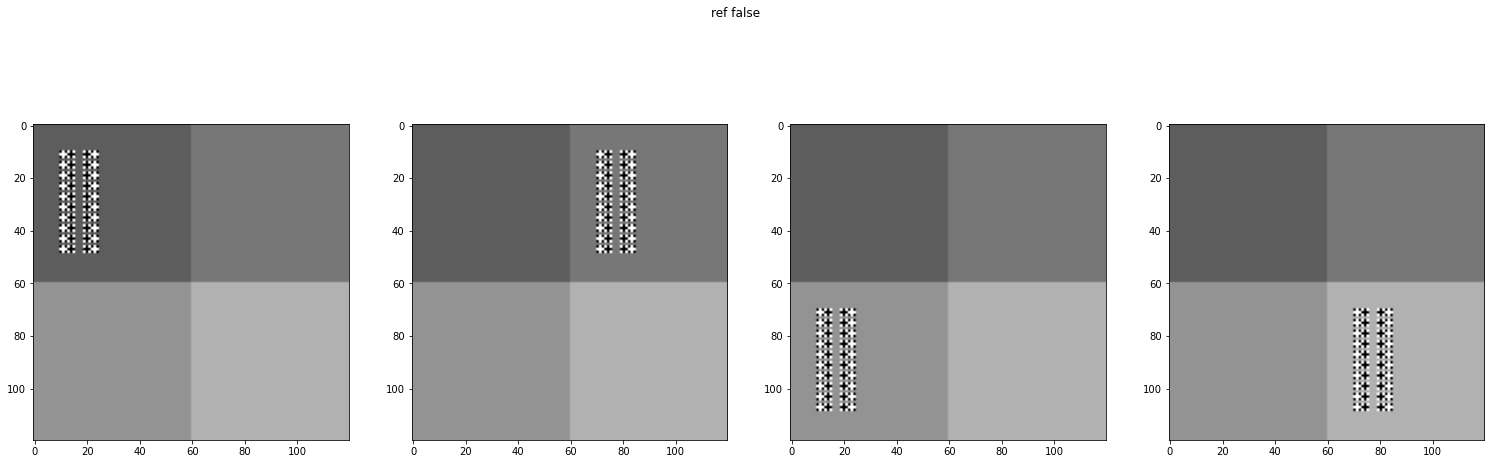

In [98]:
mir.multiplot_gray(outs, "ref false")

In [99]:
outs, d = faz_q(q, offset, step_i, ref=True)


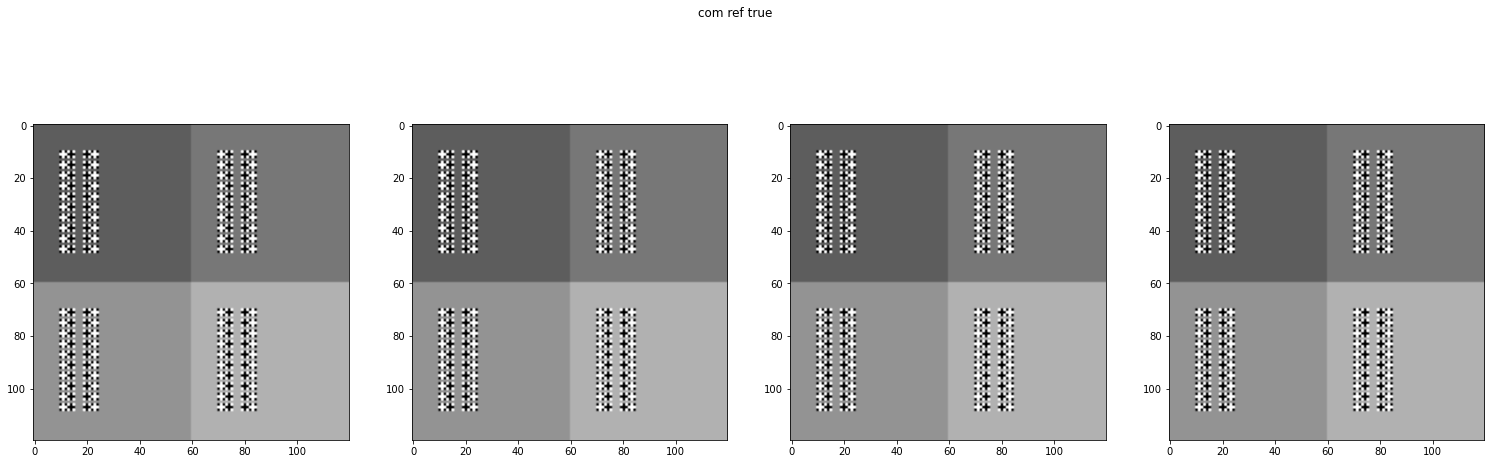

In [100]:
mir.multiplot_gray(outs, "com ref true")

In [101]:
outs, d = faz_q(q, offset, step_i, ref=False)



## Maxi list do acima

In [102]:
lb = [lb1, lb2, lb3, lb4]
ln = [ln1, ln2, ln3, ln4]
lbn = [lbn1, lbn2, lbn3, lbn4]
lnb = [lnb1, lbn2, lnb3, lbn4]

In [103]:
img0 = faz_quadrantes(q, g1,g2,g3,g4)

## Item que vai para questão

In [107]:
def replace_submatrix_2(mat, ind1, ind2, mat_replace):  
    for i in range(mat_replace.shape[0]): 
        for j in range(mat_replace.shape[1]):
            mat[ind1 + i , ind2+j] = mat_replace[i,j]
            

def insere_random(big, i, j, size):
    print("Insere random i j size:",i,j,size)
    rf = create_random_field((size,size))    
    replace_submatrix_2(big, i,j, rf)

    


    
    
    
def faz_q_com_random(img0, q, offset, step_i, ref=True):
    print("q ", q)
    offset = offset
    step_i = step_i


    i1 = 0 + offset
    i1_list = np.array(range(i1, int(q/2)-offset, step_i))
    j1 = 0 + offset
    i2 = int(q/2) + offset 
    i2_list = np.array(range(i2, int(q)-offset, step_i))
    j2 = int(q/2) + offset


    g1,g2,g3,g4 = 75,100,125,150

    
    
    
    #insere_random(img0, i1, j1, int(0.4*q))    
    #insere_random(img0, i2, j1, int(0.4*q))    
    #insere_random(img0, i2, j1, int(0.4*q))    
    #insere_random(img0, i2, j2, int(0.4*q))    
    
    sz = 40
    
    insere_random(img0, i1, j1, sz)    
    insere_random(img0, i1, j2, sz)    
    insere_random(img0, i2, j1, sz)    
    insere_random(img0, i2, j2, sz)    
    
    
    out1, lb1, ln1, lnb1, lbn1 = faz_listas_e_imagem(img0, i1_list, j1, ref=ref)
    i1_list +=1
    out2, lb2, ln2, lnb2, lbn2 = faz_listas_e_imagem(img0, i1_list, j2, ref=ref)
    out3, lb3, ln3, lnb3, lbn3 = faz_listas_e_imagem(img0, i2_list, j1, ref=ref)
    i2_list += 1
    out4, lb4, ln4, lnb4, lbn4 = faz_listas_e_imagem(img0, i2_list, j2, ref=ref)
   

    
    


    d = {}
    
    d[g1] = lb1, ln1, lnb1, lbn1
    d[g2] = lb2, ln2, lnb2, lbn2
    d[g3] = lb3, ln3, lnb3, lbn3
    d[g4] = lb4, ln4, lnb4, lbn4
    
    outs = [out1, out2, out3, out4]
    
    return outs, d



q = 120

offset = 10
step_i = 6

img0 = faz_quadrantes(120, 75,100,125,150)

outs, d = faz_q(q, offset, step_i)


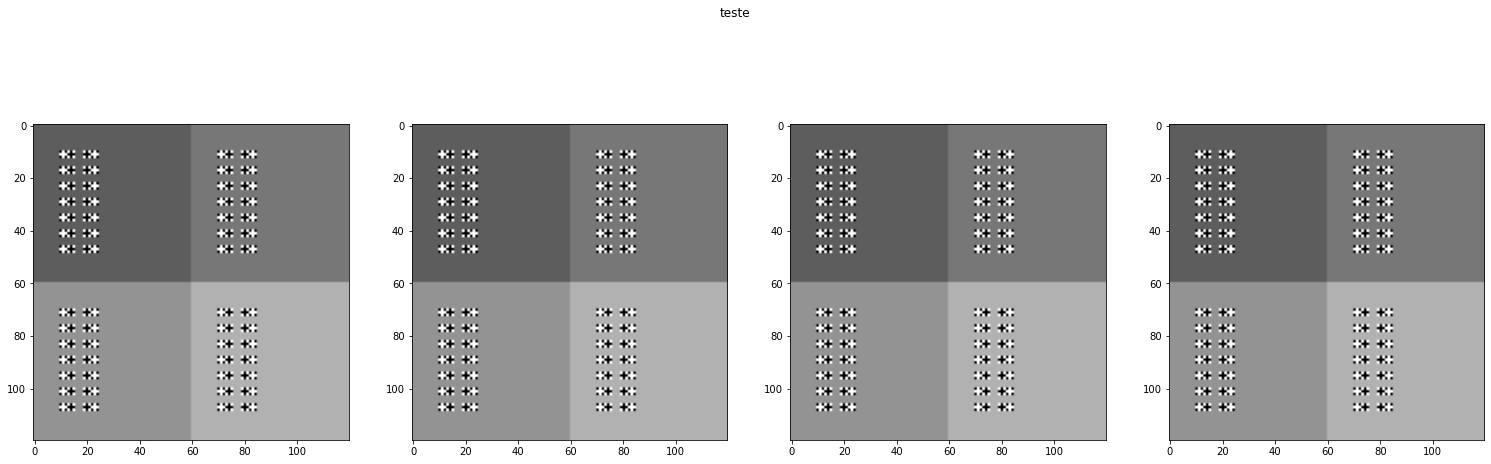

In [108]:
mir.multiplot_gray(outs, "teste")

In [109]:
item_final = outs[0]
cv2.imwrite("q1_final_v1.png", item_final)

True

In [ ]:
img1 = faz_quadrantes(120, 75,100,125,150)

outs, d = faz_q(q, offset, step_i)